# DNN for key word detection

In [28]:
DATASET_FOLDER = '../dataset/data_restaurant'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False, flatten=True)['mfcc']
ds.class_labels

['umai',
 'mazui',
 'oishii',
 'silence',
 'others',
 'a',
 'i',
 'o',
 'sushi',
 'sashimi',
 'gyouza',
 'hashi',
 'spoon',
 'fork',
 'syouyu',
 'sakana',
 'niku',
 'gohan']

((1260, 960), (540, 960))

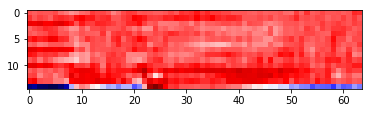

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)), cmap='seismic')
train_data.shape, test_data.shape

### DNN model

In [30]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Dense(128, input_dim=ds.shape[0]*ds.shape[1], activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               123008    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 18)                2322      
Total params: 141,842
Trainable params: 141,842
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Training DNN

In [32]:
EPOCHS = 80
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 1260 samples, validate on 540 samples
Epoch 1/80
1260/1260 [==============================] - 1s 704us/step - loss: 2.4012 - acc: 0.3143 - val_loss: 1.1936 - val_acc: 0.7704
Epoch 2/80
1260/1260 [==============================] - 0s 168us/step - loss: 1.0753 - acc: 0.6905 - val_loss: 0.5198 - val_acc: 0.8759
Epoch 3/80
1260/1260 [==============================] - 0s 167us/step - loss: 0.5813 - acc: 0.8294 - val_loss: 0.3393 - val_acc: 0.9222
Epoch 4/80
1260/1260 [==============================] - 0s 146us/step - loss: 0.3282 - acc: 0.8984 - val_loss: 0.2831 - val_acc: 0.9185
Epoch 5/80
1260/1260 [==============================] - 0s 113us/step - loss: 0.2295 - acc: 0.9373 - val_loss: 0.1892 - val_acc: 0.9500
Epoch 6/80
1260/1260 [==============================] - 0s 113us/step - loss: 0.1634 - acc: 0.9484 - val_loss: 0.1847 - val_acc: 0.9537
Epoch 7/80
1260/1260 [==============================] - 0s 158us/step - loss: 0.1238 - acc: 0.9595 - val_loss: 0.1774 - val_acc: 0.9556
E

1260/1260 [==============================] - 0s 167us/step - loss: 0.0065 - acc: 0.9968 - val_loss: 0.2393 - val_acc: 0.9667
Epoch 61/80
1260/1260 [==============================] - 0s 217us/step - loss: 0.0068 - acc: 0.9976 - val_loss: 0.2039 - val_acc: 0.9704
Epoch 62/80
1260/1260 [==============================] - 0s 219us/step - loss: 0.0103 - acc: 0.9968 - val_loss: 0.2222 - val_acc: 0.9704
Epoch 63/80
1260/1260 [==============================] - 0s 202us/step - loss: 0.0095 - acc: 0.9960 - val_loss: 0.2708 - val_acc: 0.9667
Epoch 64/80
1260/1260 [==============================] - 0s 168us/step - loss: 0.0149 - acc: 0.9944 - val_loss: 0.2552 - val_acc: 0.9667
Epoch 65/80
1260/1260 [==============================] - 0s 166us/step - loss: 0.0055 - acc: 0.9992 - val_loss: 0.2302 - val_acc: 0.9648
Epoch 66/80
1260/1260 [==============================] - 0s 167us/step - loss: 0.0085 - acc: 0.9984 - val_loss: 0.2101 - val_acc: 0.9667
Epoch 67/80
1260/1260 [==============================

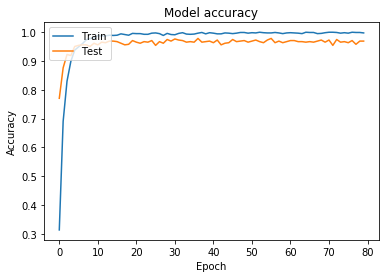

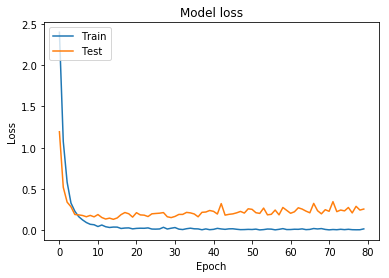

In [34]:
plot_accuracy(history)
plot_loss(history)

## Save the model

In [35]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/key_word_detection_dnn_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [36]:
del model
model = models.load_model(filename)

## Confirmation

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [39]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [40]:
class_labels

['umai',
 'mazui',
 'oishii',
 'silence',
 'others',
 'a',
 'i',
 'o',
 'sushi',
 'sashimi',
 'gyouza',
 'hashi',
 'spoon',
 'fork',
 'syouyu',
 'sakana',
 'niku',
 'gohan']

In [41]:
(activations[-1][:10]*100).astype(int)

array([[  0,   0, 100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 100,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,

In [42]:
test_labels[:10].astype(int)

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])